# STOR 320: Introduction to Data Science
## Lab 11

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

Diabetes dataset:

We use the dataset from last lab to perform cross validation.

In [3]:
# Load the dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [4]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target variable to the DataFrame
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create polynomial features of second order
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Convert to DataFrame for better understanding
feature_names = poly.get_feature_names_out(input_features=datasets.load_diabetes().feature_names)
X_train_poly_df = pd.DataFrame(X_train_poly, columns=feature_names)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=feature_names)

# Display the first few rows of the new training set
X_train_poly_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s3^2,s3 s4,s3 s5,s3 s6,s4^2,s4 s5,s4 s6,s5^2,s5 s6,s6^2
0,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078,...,0.001578,-0.001363,-0.001087,0.000043,0.001177,0.000939,-0.000037,7.487912e-04,-0.000029,0.000001
1,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633,...,0.005308,-0.005188,-0.000020,-0.001430,0.005071,0.000019,0.001398,7.424434e-08,0.000005,0.000385
2,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504,...,0.000043,0.000017,-0.000112,0.000089,0.000007,-0.000044,0.000035,2.902277e-04,-0.000230,0.000182
3,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483,...,0.000914,-0.001194,-0.001508,-0.003915,0.001560,0.001970,0.005114,2.487261e-03,0.006458,0.016766
4,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,...,0.003562,-0.004560,-0.002216,-0.002537,0.005836,0.002836,0.003247,1.378551e-03,0.001578,0.001806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920,...,0.000066,-0.000322,-0.000484,-0.000683,0.001560,0.002349,0.003314,3.536821e-03,0.004991,0.007043
349,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491,...,0.000240,-0.000612,0.000134,0.000240,0.001560,-0.000341,-0.000612,7.465999e-05,0.000134,0.000240
350,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078,...,0.006099,-0.003084,-0.000851,-0.000084,0.001560,0.000431,0.000043,1.188809e-04,0.000012,0.000001
351,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,...,0.000311,0.000046,0.000678,0.000676,0.000007,0.000100,0.000099,1.479150e-03,0.001475,0.001471


## 1. Based on the LASSO model from last lab, use 10-fold cross validation to find the best value of labmda for the LASSO.

### The search grid is `np.logspace(-7, 2, num=20, base=10)`. The metric is MSE.

### Visualize the MSE as a function of the value of lamda. What is the best value of lambda? What is its corresponding MSE?

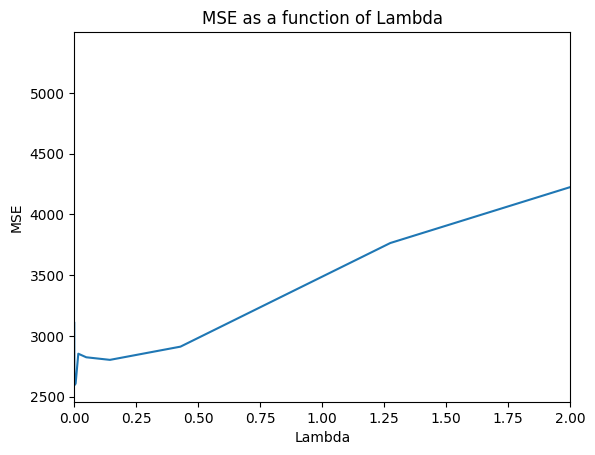

In [12]:
MSE = []
for lamda in np.logspace(-7, 2, num=20, base=10):
    lasso = Lasso(alpha=lamda, random_state=88)
    lasso.fit(X_train_poly, y_train)
    y_pred_train = lasso.predict(X_train_poly)
    y_pred_test = lasso.predict(X_test_poly)
    MSE.append(mean_squared_error(y_test, y_pred_test))

plt.plot(np.logspace(-7, 2, num=20, base=10), MSE)
plt.xlim(0, 2)
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("MSE as a function of Lambda")
plt.show()

In [15]:
best_lambda = np.logspace(-7, 2, num=20, base=10)[np.argmin(MSE)]
print(f"The best value of lambda is {best_lambda} with corresponding MSE {MSE[np.argmin(MSE)]}")

The best value of lambda is 0.0018329807108324338 with corresponding MSE 2595.6511270490687


## 2. Based on the Ridge model from last lab, use 5-fold cross validation to find the best value of labmda for the Ridge.

### The search grid is `np.logspace(-4, 2, num=50, base=10)`. The metric is MSE.

### Visualize the MSE as a function of the value of lamda. What is the best value of lambda? What is its corresponding MSE?

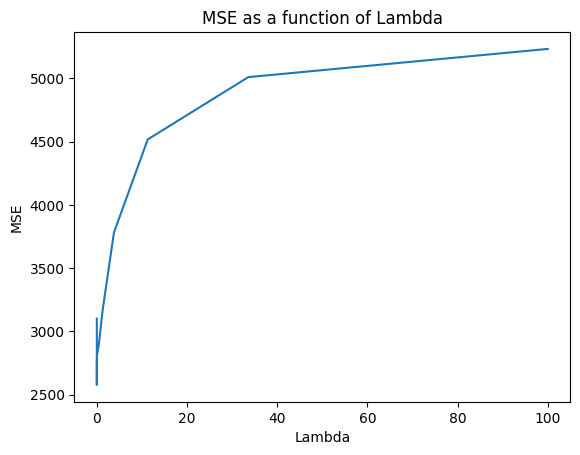

In [18]:
MSE = []
for lamda in np.logspace(-7, 2, num=20, base=10):
    ridge = Ridge(alpha=lamda, random_state=88)
    ridge.fit(X_train_poly, y_train)
    y_pred_train = ridge.predict(X_train_poly)
    y_pred_test = ridge.predict(X_test_poly)
    MSE.append(mean_squared_error(y_test, y_pred_test))

plt.plot(np.logspace(-7, 2, num=20, base=10), MSE)
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("MSE as a function of Lambda")
plt.show()


In [19]:
best_lambda = np.logspace(-7, 2, num=20, base=10)[np.argmin(MSE)]
print(f"The best value of lambda is {best_lambda} with corresponding MSE {MSE[np.argmin(MSE)]}")

The best value of lambda is 0.0006158482110660261 with corresponding MSE 2576.5139825764113


## 3. Based on the PCR model from last lab, use 5-fold cross validation to find the best value of number of PC.

### The search grid is `np.linspace(1, 60, 30).astype('int')`. The metric is R2.

### Visualize the R2 as a function of the value of number of PC. What is the best value of PC? What is its corresponding R2?

In [20]:
def OSR2(y_train, y_test, y_pred):
    
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

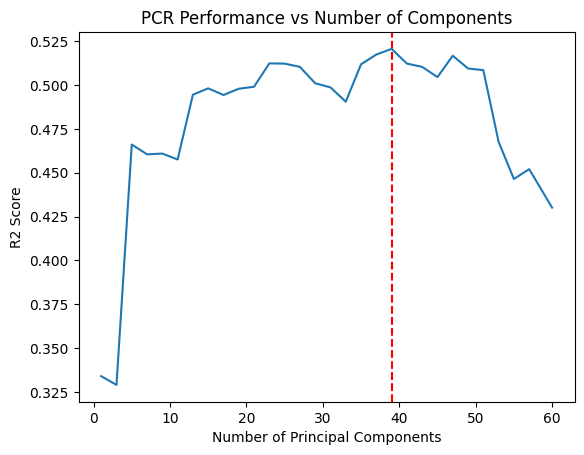

In [26]:
PCR = []
for num_pc in np.linspace(1, 60, 30).astype("int"):
    
    pca = PCA(n_components=num_pc)
    X_train_pca = pca.fit_transform(X_train_poly)
    X_test_pca = pca.transform(X_test_poly)
    
    lr = LinearRegression()
    lr.fit(X_train_pca, y_train)
    
    y_pred = lr.predict(X_test_pca)
    
    PCR.append(OSR2(y_train, y_test, y_pred))

best_num_pc = np.linspace(1, 60, 30).astype('int')[np.argmax(PCR)]

plt.axvline(x=best_num_pc, color="red", linestyle="--")
plt.plot(np.linspace(1, 60, 30).astype("int"), PCR)
plt.xlabel("Number of Principal Components")
plt.ylabel("R2 Score")
plt.title("PCR Performance vs Number of Components")
plt.show()

In [25]:
print(f"The best value of number of principal components is {best_num_pc} with corresponding R²= {PCR[np.argmax(PCR)]}")

The best value of number of principal components is 39 with corresponding R²= 0.5205752756407203
